## Supervised Learning
### Project: Finding Donors for *CharityML*
#### GOAL: Make a model that predicts whether an individual makes more than $50,000

----
## Exploring the data

In [25]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 

import visuals as vs
%matplotlib inline 

data = pd.read_csv("census.csv")
# data.dytpes

display(data.head(n=2))
data.shape
data.shape[0]

age          workclass education_level  education-num       marital-status  \
0   39          State-gov       Bachelors           13.0        Never-married   
1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   

         occupation    relationship    race    sex  capital-gain  \
0      Adm-clerical   Not-in-family   White   Male        2174.0   
1   Exec-managerial         Husband   White   Male           0.0   

   capital-loss  hours-per-week  native-country income  
0           0.0            40.0   United-States  <=50K  
1           0.0            13.0   United-States  <=50K

45222

### Implementation: Data Exploration

In [12]:
data[data.income == '>50K'].shape

(11208, 14)

In [13]:

n_records = data.shape[0]
n_greater_50K = data[(data.income == '>50K')].shape[0]
n_at_most_50K = data[(data.income == '<=50K')].shape[0]
greater_percent = 100.0 * n_greater_50K / n_records



print "Total number of records: {:,}".format(n_records)
print "Individuals making more than $500,000: {:,}".format(n_greater_50K)
print "Individuals making at most $500,00: {:,}".format(n_at_most_50K)
print "Percentage of individuals making more than 50K: {:0.3f}%\n".format(greater_percent)

Total number of records: 45,222
Individuals making more than $500,000: 11,208
Individuals making at most $500,00: 34,014
Percentage of individuals making more than 50K: 24.784%



----
## Preparing the Data
* Preprocessing (cleaned, formatted, reconstructed) the data, then input the data for machine learning algorithms
* Hmmm, this dataset has no missing entries or invalid entries.
* But there some qualities about certain features that we need to adjust. 

### 1. Transforming skewed continous features
   - Some features have values lie near a single number, but also have some non-trivial number that way larger than 
   - The single number. Algorithms are sensitive to these distributions. 
   - 'capital-gain' and 'capital-loss' are these features.
   - Thinking: 
       - What if I don't what problems this dataset has?
       - What if I don't which features have this problem? 

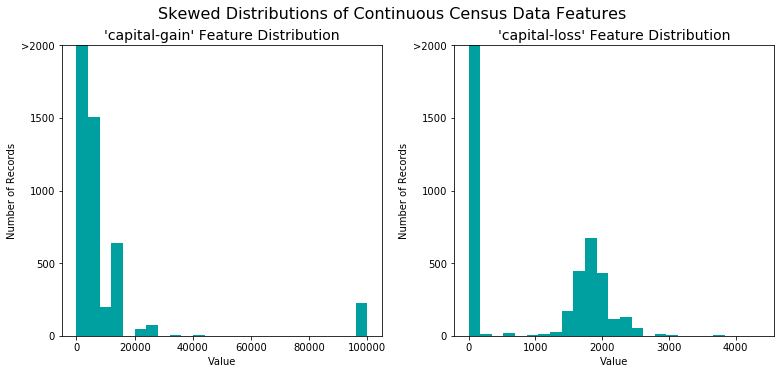

In [14]:
# Time to split features and targets. I'm gonna need these features to predict targetes. 
income_raw = data['income'] # target
features_raw = data.drop('income', axis = 1) # features

# Visualize skewed continous features of original data
vs.distribution(data)

 So, the solution is using logarithmic to mitigate negative effects caused by very large and very small values. 
 However, we need to make sure it's greater than 0; otherwise, undefined in log. 


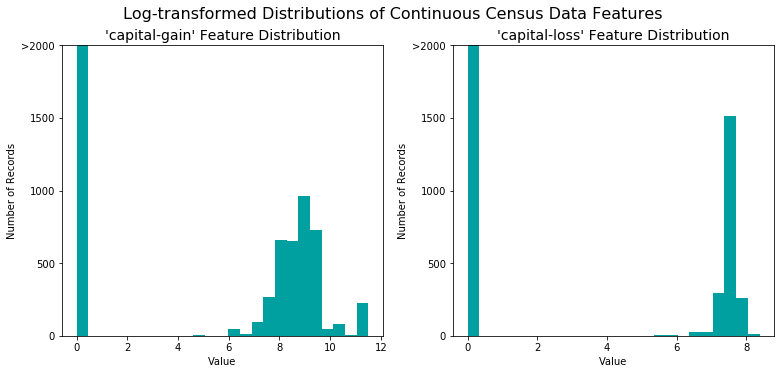

In [15]:
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

vs.distribution(features_log_transformed, transformed = True)

### 2. Normalizing numerical features
 - Scaling on numerical features; this is good;
 - It won't change shape of distribution;
 - Just make sure each features is treated equally when applying supervised leanrers;
 - Note: once scaling is applied, observing the data in its raw form will no longer have the same original meaning.
 - Thinking: 
     - What if I am not told to use normailzied scaling to do preprocessing?
     - What if I don't which features need to be normalized?

In [16]:
from sklearn.preprocessing import MinMaxScaler 

# #Initiate a scaler, then apply it to the feature.
scaler = MinMaxScaler() # default = (0, 1) # Anything relates to PCA?
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])
 
display(features_log_minmax_transform.head(n=7))

age          workclass education_level  education-num  \
0  0.301370          State-gov       Bachelors       0.800000   
1  0.452055   Self-emp-not-inc       Bachelors       0.800000   
2  0.287671            Private         HS-grad       0.533333   
3  0.493151            Private            11th       0.400000   
4  0.150685            Private       Bachelors       0.800000   
5  0.273973            Private         Masters       0.866667   
6  0.438356            Private             9th       0.266667   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners         Husband   Black   
4      Married-civ-spouse      Prof-specialty            Wife   Black   
5      Married-civ-spouse     Exec-managerial            Wife   White   
6   Married-spouse-absent       Other-service   Not-in-family   Black   

       sex  capital-gain  capital-loss  hours-per-week  native-country  
0     Male      0.667492           0.0        0.397959   United-States  
1     Male      0.000000           0.0        0.122449   United-States  
2     Male      0.000000           0.0        0.397959   United-States  
3     Male      0.000000           0.0        0.397959   United-States  
4   Female      0.000000           0.0        0.397959            Cuba  
5   Female      0.000000           0.0        0.397959   United-States  
6   Female      0.000000           0.0        0.153061         Jamaica

### 3. Implementation: Data Preprocessing
 - From non-numeric to numeric;
 - Use 'one-hot encoding' on 'features_raw';
 - Convert 'incomea_raw' to numerical entries. 

In [17]:
features_final = pd.get_dummies(features_log_minmax_transform)

income = income_raw.map({'<=50K':0, '>50K':1})
# 0:0, 1:1 means 

encoded = list(features_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

print encoded
# features_final.shape

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### 4. Shuffle and split data
 - All categorical variables've been converted into numerical features;
 - All numerical features've been normalized.

In [26]:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size = 0.2, random_state = 42)

print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

# display(X_train)
# display(X_test)

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance

### 1. Metrics and Naive Predictor
 - Tools: Fbeta, accuracy, precision, recall;
 - '>50K' are more likely to donate;
 - So, this project is working on predicting '>50K' accurately;
 - Metric: accuracy;
 - If identify '>50K' as '<=50K', it's detrimental;
 - So, 'recall' is less important here;
      - **Positive**: classified as '>50K';
      - **Negative**: classified as '<=50K';
      - **True Positive**: successfully classified as '>50K';
      - **False Positive**: mistakenly classified as '>50K';
      - **True Negative**: successfully classified as '<=50K';
      - **False Negative**: mistakenly classified as '<=50K'
 - Use 'F beta score' to include both recall and precision;
 - Most samples are '<=50K';
 - Naive statement: arbitrarily say everyone is '<=50K' without looking data, the prediciton won't be too bad;
     

### Question 1 - Naive Predictor Performance 

In [19]:

beta = 0.5

accuracy = greater_percent/100

TP = n_greater_50K
TN = 0
FP = n_at_most_50K
FN = 0

recall = float(TP) / float((TP + FN))
precision = float(TP) / float((TP + FP))

f_score = (1 + 0.5**2) * ((precision * recall)/(0.5**2 * (precision * recall) + 1))


print "Naive predictor: [Accuracy score: {:.4f}, F-score: {:.4f}] ".format(accuracy, f_score)

Naive predictor: [Accuracy score: 0.2478, F-score: 0.2917] 


### 2. Supervised Learning Models
 - Decision Trees
 - Support Vector Machines (SVM)
 - Ensemble Methods (Random Forest)

### Question 2 - Model Application

#### Model 1: Decision Tree
 - Application:  
 
     This algorithm has been widely used in advertiment industry that classifies data. 
 The companies such as Amazon, Youtube Google will send my related news, products, videos according to gender, age, area, nationality, browsing history, the most clicked items, etc. They're no longer spams, and they quitely got my attentions sometimes. 
 
 

 - Strength:
 
 It requires little data preparation, unlike other techniques which need data normalization 
 (http://scikit-learn.org/stable/modules/tree.html).
 It is easy to understand, visualised interpret 
 (http://scikit-learn.org/stable/modules/tree.html).
 It is easy to deal with both numerical and categorical data 
 (http://scikit-learn.org/stable/modules/tree.html).

 
 
 - Weakness:
 
  It would casue overfitting problems when minimum number required at a leaf node or maximum depth of the tree are not setting well (http://scikit-learn.org/stable/modules/tree.html).
 Results of the algorithm is unstable when there are small variations in data (http://scikit-learn.org/stable/modules/tree.html).
 It would create biased trees if some classes dominate (http://scikit-learn.org/stable/modules/tree.html).
 

 - Why this one:
 
  Decision tree allows to med do non-linear decision making with simple linear decision surface;
  Decision tree will find out the most important features and seprate data wisely;
  This data set is really fit in this scenario, a classification problem with many features;
  So, I give decision tree a shot. 


#### Model 2: SVM
 - Application:
 
 Classification of images and recognition of hand-written characters will need SVM algorithm, 
 becuase it can increase accuracy significantly, according to the wikipedia
 (https://en.wikipedia.org/wiki/Support_vector_machine). 
 
 
 - Strength:
 
 It is effective in high dimensional spaces, especially when there are many features (http://scikit-learn.org/stable/modules/svm.html#svm-classification).
 It is memory efficient because it uses subset of training points in decision funcitons (http://scikit-learn.org/stable/modules/svm.html#svm-classification).
 It can use hyperplane to separate data points of different classes by manunly changing hyper-parameters.


 - Weakness:
 
 It is time-consuming;
 It may cause overfitting problems with wrong hyper-parameters;
 It does not provide probabilitistic estimates. 


 
 - Why this one:
 Because SVM can do really in complicated domains where thre is clear margin of seperation. 
 Many features in this data set can create a clear margin of seperation. 
 

#### Model 3: Random Forest
 - Application:
 
 It can be used in voices and images classification.
 
 
 - Strength:
 
 It can correct decision trees' habit of overfitting to their training set (https://en.wikipedia.org/wiki/Random_forest).
 It can automatically select featuers and output importance. 

 
 
 - Weakness:
 
 It is less interpretable. 
 
 
 - Why this one:
 
 This dataset has multiple features;
 Random Forest works well with a mixture of numerical and categorical features
 https://datascience.stackexchange.com/questions/6838/when-to-use-random-forest-over-svm-and-vice-versa.


### 3. Implementation - Creating a Training and Predicting Pipeline
 - 1.Import "fbeta_score" and "accuracy_score" from sklearn.metrics;
 - 2.Fit the learner to the sampled training data and record the training time;
 - 3.Perform predictions on the test data: X_test, and also on the first 300 training points X_train[:300].
 - 4.Record the total prediciton time.
 - 5.Calculate the accuracy_score for both training subset and testing subset.
 - 6.Calculate the F-score for both training subset and testing subset, with beta parameter.

In [20]:
from sklearn.metrics import fbeta_score 
from sklearn.metrics import accuracy_score 
from time import time


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
                 #learner is algorithms
    
    results = {}
    X_train = X_train[:300] # Slice features training data
    y_train = y_train[:300] # Slice income(target) training data
    
    start = time()
    learner.fit(X_train, y_train) # Fit the learner to the sampled training data.
    end = time()
    results['train_time'] = end - start # Calculate the training time.
    
    start = time()
    pred_test = learner.predict(X_test) # Get predictions on test set(X_test)
    pred_train = learner.predict(X_train) # Get predictions on first 300 samples(X_train) 
    end = time()
    results['pred_time'] = end - start # Calculate the total prediction time
    
    results['acc_train'] = accuracy_score(y_train, pred_train) # Calculate the accuracy on first 300 training set
    results['acc_test'] = accuracy_score( y_test, pred_test) # Calculate the accuracy on testing set
    
    results['f_train'] = fbeta_score(y_train, pred_train, beta = 0.5) 
    results['f_test'] = fbeta_score(y_test, pred_test, beta = 0.5)
    
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
    
    return results


### 4. Implementation: Initial Model Evaluation
 - 1.Import my algorithms.
 - 2.Initialize the three models and store them in 'clf_A', 'clf_B', 'clf_C'.
 - 3.If there is "ramdom state", use it.
 - 4.Calculate number of records equal to 1%, 10%, and 100% of the training data.
 - 5.Store those values in 'sample_1', 'sample_10', 'sample_100' respectively

SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.


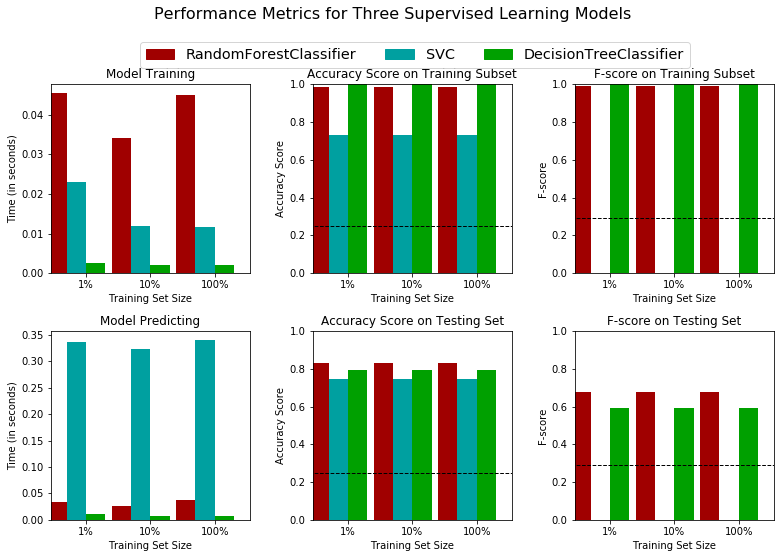

In [27]:
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 

clf_A = SVC(random_state = 101)
clf_B = tree.DecisionTreeClassifier(random_state = 42)
clf_C = RandomForestClassifier(random_state = 42)

samples_100 = len(y_train)
samples_10 = int(0.1*len(y_train))
samples_1 = int(0.01*len(y_train))

# # Collect results on learner
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):

        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)


vs.evaluate(results, accuracy, f_score)


---
## Improving results

### Question 3 - Choosing the best model
   I'll choose RandomForest Classifier;
   It has a rougly 0.8 accuray on test set, a 0.6 Fbeta score, a quick model predicting time though the training time relatively slow; 
   It fits classification problems well. 

### Question 4 - Describing the Model in Layman's Terms

 - Random forest is built upon many decision trees. 
 - Think about decision trees firstly. 
 - Now, there a data set in my hand, more than 50,000 people with occupations, education and ten more infomation of them, but income information is hidden;
 - I want to make a guess on whether the person makes more than 50K;
 - Decision trees will look at the features and split the data based on the most important features. (Because the equation behind decision tree can find out the most important features.)
 - A decision tree will firstly consider whether the person has a 'capital-loss'.
 - Given yes, we may nee to check age; 
 - Given age is old enough, we keep checking other features. 
 - The process is like a oounter tree, and each of its branch is like this:
 - A small 'capital-loss'? Yes, a  relatively older 'age'? Yes, a higher 'capital-gain'? Yes, a big 'hour-per-week'? Yes, a good 'education-num'? Yes. Then, we might assume this person makes more than 50K.
 
 
 - Random forest uses a lot of decision trees, where each tree a little bit different from the others. 
 - When we nee to predict a new person's income, we take the majority vote of the decision tree to reach a final result.
 
 - Reference: https://www.quora.com/How-do-you-explain-decision-tree-and-random-forests-in-layman%E2%80%99s-terms


### 1. Implementation: Model Tuning
 - 1.Use grid search with at least one important parameter tunned with at least 3 different values;
 - 2.Import gridsearch and make_scorer;
 - 3.Initialize the classifier I've chosen and store it in clf;
      - Set a random_state;
 - 4.Create a dictionary of paremeters;
      - Parameters = {'parameter': [list of values] 
      - Don't tune max_features;
 - 5.Use make_score to create an fbeta_score scoring object;
 - 6.Perform gridsearch on the clf using the 'scorer' and store it in grid_obj;
 - 7.Grid_fit(X_train, y_train)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

clf = RandomForestClassifier(random_state = 42)

parameters = {'min_samples_split':[2, 20, 50]}

scorer = make_scorer(fbeta_score, beta=0.5)
# reference: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

grid_obj = GridSearchCV(clf, parameters)

grid_fit = grid_obj.fit(X_train, y_train)
            

best_clf = grid_fit.best_estimator_

predictions = (clf.fit(X_train, y_train)).predict(X_test)

best_predictions = best_clf.predict(X_test)


# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))


Unoptimized model
------
Accuracy score on testing data: 0.8407
F-score on testing data: 0.6943

Optimized Model
------
Final accuracy score on the testing data: 0.8600
Final F-score on the testing data: 0.7446


### Question 5 - Final Model Evaluation

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |      0.8407       |     0.8600      |
| F-score        |      0.6943       |     0.7446      |

 - The scores are better after optimized. 
 - The score of naive predictor is 0.2478, but the optimized is 0.8603, huge difference. 


---
## Feature Importance

  - Which feature provides the most predictive power?
  - In this project, we wish to identify a small number of project that most correlated

In [71]:
# features_final.corr() we got categorical features, so couldn't apply this. 

### Question 6 - Feature Relevance Observation
 - 1.Occupation; this is where income come from;
 - 2.Capital gain; extra money make people generous sometimes;
 - 3.Education level; this indirectly correlaed with inome;
 - 4.Education num; this also may indirectly correlated with income;
 - 5.Age; the younger are usually poorer; the older are usually richer;
 

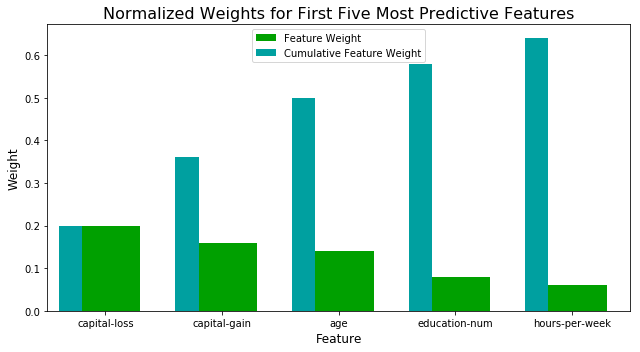

In [29]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier().fit(X_train, y_train)
                        # ()

importances = model.feature_importances_

vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance
 - 1.Capital loss；
 - 2.Age;
 - 3.Capital gain;
 - 4.House per week;
 - 5.Education num;
 
 
 - Well, there are differences, but I got 3 right.
 - What I missed are: capital loss and hours per week.
 - About capital loss, I checked the dataset and found out most of them are 0, so I thought this feature probably wasn't that important;
 - About hour per week, I assumed that hours per week wasn't as useful as dollars per hour, because I believed someone worked less but earned a lot and someone was vice versa, so I ignored this feature;
 - It turned out that they two matter. 
 - The importance of the feature are ranked by the height of the coloums. 
 - Three of my features are ranked in the top five important features. 

### 1. Feature selection

In [30]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8600
F-score on testing data: 0.7446

Final Model trained on reduced data
------
Accuracy on testing data: 0.8302
F-score on testing data: 0.6828


### Question 8 - Effects of Feature Selection
 - Unexpectedly, the accuracy socre and F score drop. 
 - If training time was a factor, I might consider using the reduced data as my training set;
 - Time is costly sometimes, and 0.86 and 0.829 are not significantly different, so I'll choose a qucker way.  